In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import display

# Data processing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [2]:
# Load the dataset
data_url = "https://www.dropbox.com/scl/fi/alydkzx7stzpgk1ad8slv/WA_Fn-UseC_-Telco-Customer-Churn.csv?rlkey=6z4csryifaf0m89q4uup34a4r&st=ycb2nw9d&dl=1"

df = pd.read_csv(data_url)

display(df.head())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df = df.drop_duplicates()

In [4]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Convert numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df = df.dropna(subset=['TotalCharges'])

In [8]:
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [10]:
df.drop(columns=['customerID'], inplace=True)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


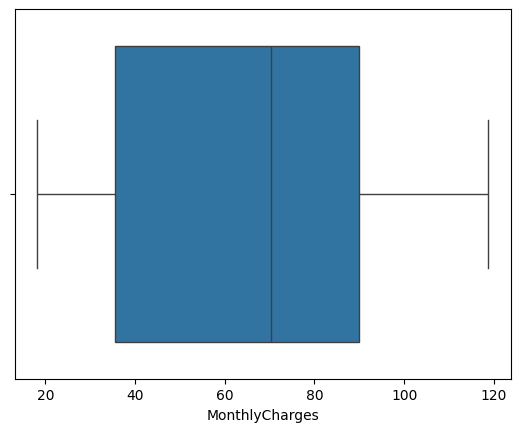

In [12]:
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

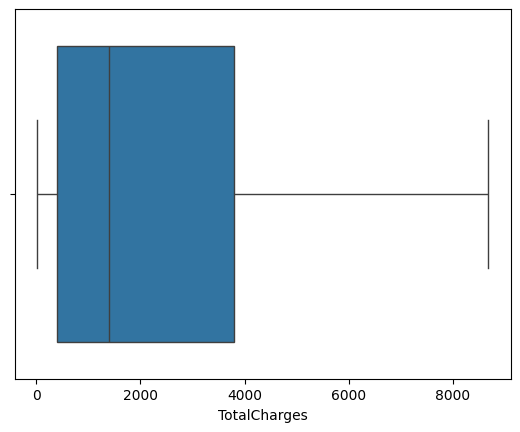

In [13]:
sns.boxplot(x=df['TotalCharges'])
plt.show()

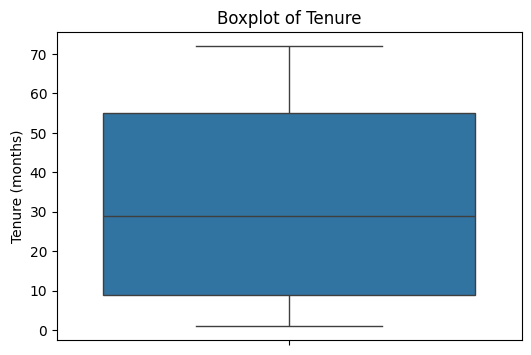

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='tenure', data=df)
plt.title("Boxplot of Tenure")
plt.ylabel("Tenure (months)")
plt.show()


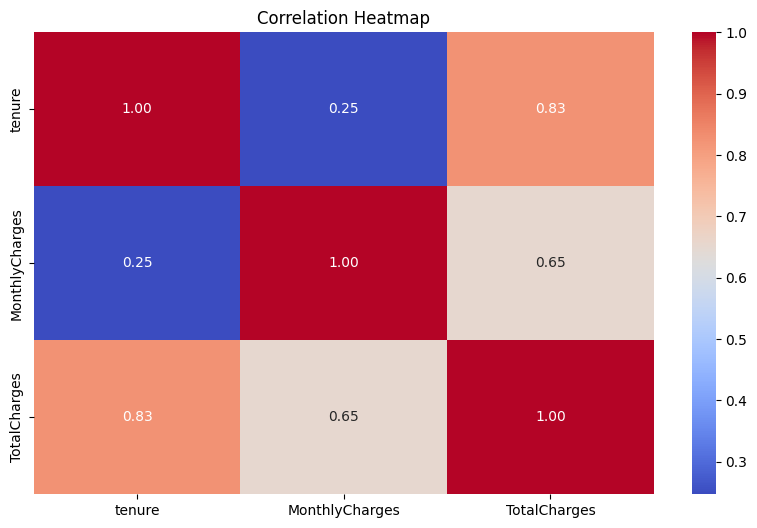

In [15]:
# Subset the DataFrame to include only the columns of interest
df_subset = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-16-aecf425d2ce6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


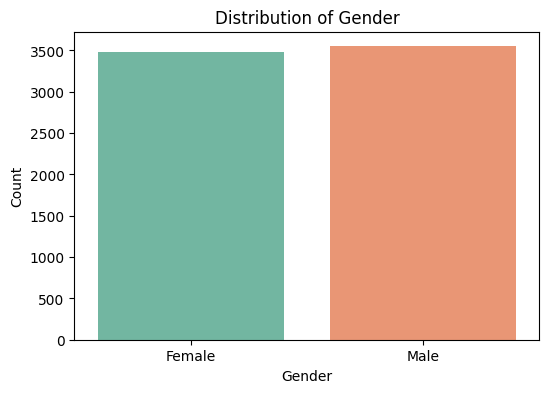

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [17]:
df.drop(columns=['gender'], inplace=True)

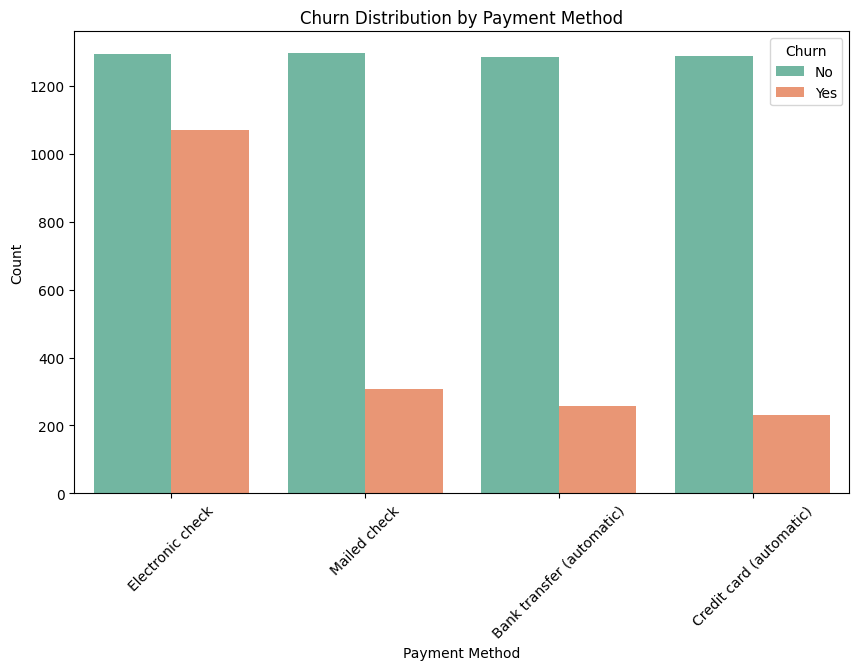

In [18]:
# (Grouped Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

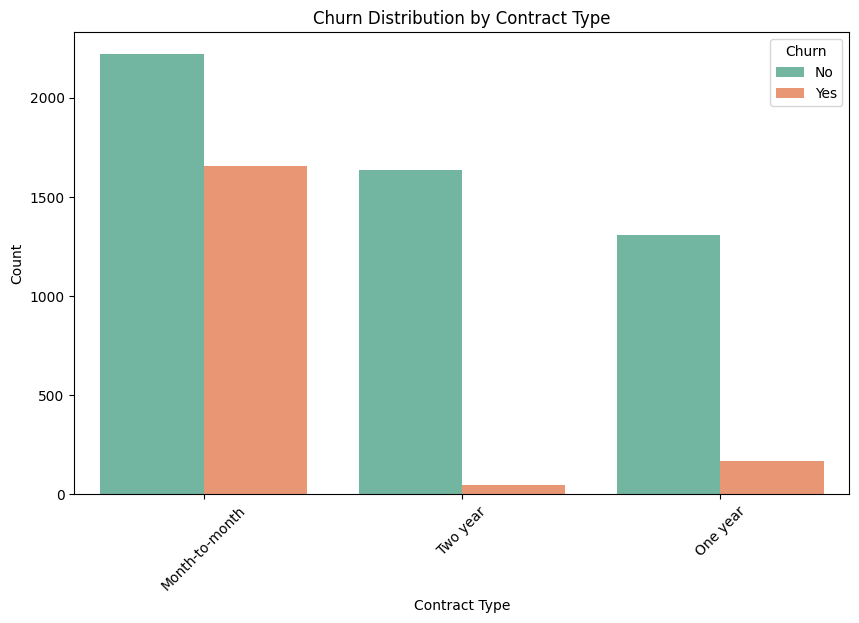

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2', order=df['Contract'].value_counts().index)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

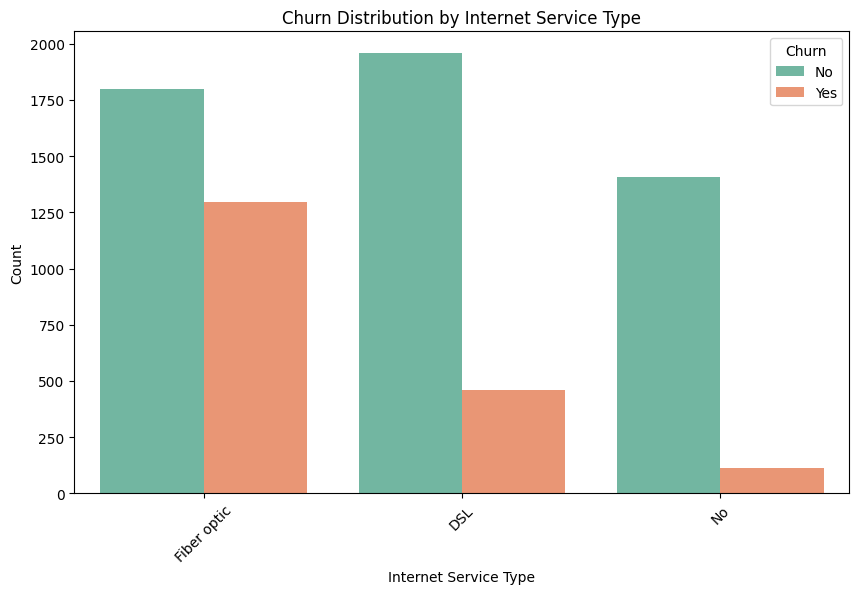

In [20]:

plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2', order=df['InternetService'].value_counts().index)
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

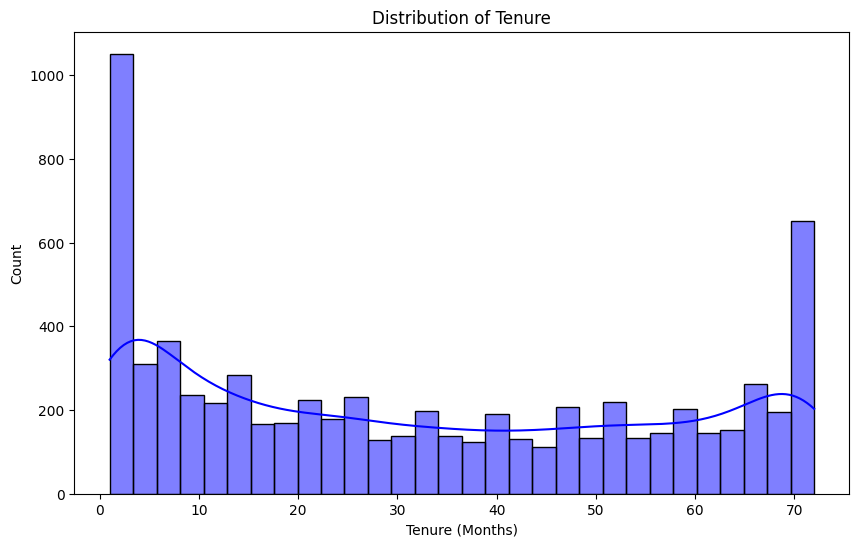

In [21]:
# رسم Histogram لتوزيع tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

In [22]:
unique_contracts = df['Contract'].unique()
print(unique_contracts)

['Month-to-month' 'One year' 'Two year']


In [23]:
unique_InternetService = df['InternetService'].unique()
print(unique_InternetService)

['DSL' 'Fiber optic' 'No']


In [24]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
columns_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','StreamingTV']
for col in columns_to_fix:
    df[col] = df[col].replace('No internet service', 'No')

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable 'Churn' from categorical features
categorical_cols.remove('Churn')

# Label Encoding
binary_cols = ['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','StreamingTV','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Label Encoding
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding
multi_class_cols = list(set(categorical_cols) - set(binary_cols))
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,False,True,False,False,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.50,0,False,False,True,True,False,False,False
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,False,False,True,False,False,False,False
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,0,False,False,False,True,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,False,True,False,False,False,True,False


In [26]:
#Calculate Max prior to scaling
max_tenure = df['tenure'].max()

# Define bins and labels for tenure grouping
bins = [0, 12, 36, max_tenure]
labels = ['New', 'Experienced', 'Loyal']

# Create new tenure group column
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode TenureGroup
df = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)


# Check new column
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TenureGroup_Experienced,TenureGroup_Loyal
0,0,1,0,1,0,0,0,1,0,0,...,0,False,True,False,False,False,False,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,0,False,False,True,True,False,False,False,True,False
2,0,0,0,2,1,0,1,1,0,0,...,1,False,False,True,False,False,False,False,False,False
3,0,0,0,45,0,0,1,0,1,1,...,0,False,False,False,True,False,False,False,False,True
4,0,0,0,2,1,0,0,0,0,0,...,1,False,True,False,False,False,True,False,False,False


In [27]:
# Drop unnecessary columns
columns_to_drop = ['tenure']
df.drop(columns=columns_to_drop, inplace=True)

print(f"Final Shape of Data: {df.shape}")

Final Shape of Data: (7032, 24)


In [28]:
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

In [29]:
print(df.columns.tolist())

['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No', 'TenureGroup_Experienced', 'TenureGroup_Loyal']


## Model Building



In [30]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<ipython-input-31-de0fadc2bbe4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter_before.keys()), y=list(counter_before.values()), palette='viridis')


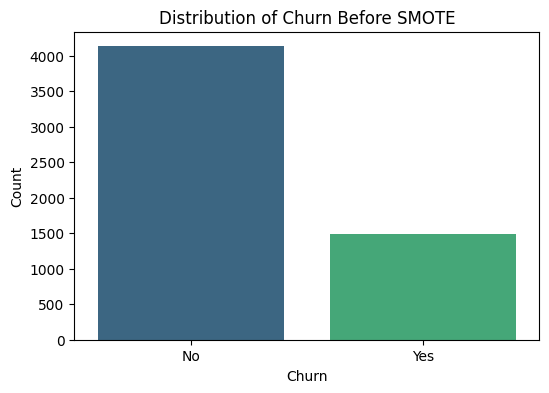

In [31]:
counter_before = Counter(y_train)
plt.figure(figsize=(6,4))
sns.barplot(x=list(counter_before.keys()), y=list(counter_before.values()), palette='viridis')
plt.title('Distribution of Churn Before SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

#  Define numerical columns to scale
num_cols_to_scale = ['MonthlyCharges', 'TotalCharges']

# Apply StandardScaler after splitting
scaler = StandardScaler()
X_train[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

#  Display class balance before SMOTE
print(f'Before SMOTE: {Counter(y_train)}')

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display class balance after SMOTE
print(f'After SMOTE: {Counter(y_train)}')


Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})


<ipython-input-33-b9183e27cf53>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter_after.keys()), y=list(counter_after.values()), palette='viridis')


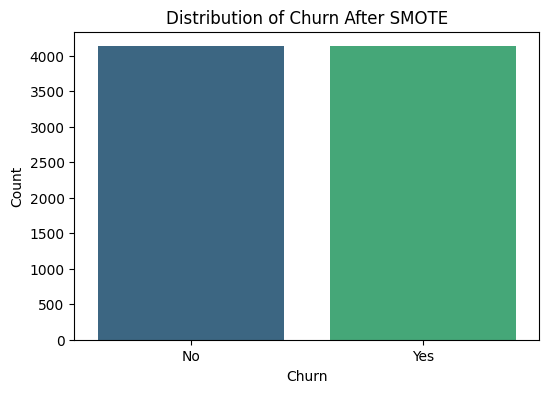

In [33]:
counter_after = Counter(y_train)

plt.figure(figsize=(6,4))
sns.barplot(x=list(counter_after.keys()), y=list(counter_after.values()), palette='viridis')
plt.title('Distribution of Churn After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


In [34]:
display(df.head())

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TenureGroup_Experienced,TenureGroup_Loyal
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,0,0,0,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [35]:
print(df.dtypes)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
PaymentMethod_Credit card (automatic)      int64
PaymentMethod_Electronic check             int64
PaymentMethod_Mailed check                 int64
Contract_One year                          int64
Contract_Two year                          int64
InternetService_Fibe

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

print(f"🔹 Logistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


🔹 Logistic Regression Results:
Accuracy: 0.74
Precision: 0.51
Recall: 0.72
F1-score: 0.60
ROC-AUC: 0.82


In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])

print(f"🔹 Decision Tree Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


🔹 Decision Tree Results:
Accuracy: 0.71
Precision: 0.47
Recall: 0.60
F1-score: 0.53
ROC-AUC: 0.68


In [38]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])

print(f"🔹 Decision Tree Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


🔹 Decision Tree Results:
Accuracy: 0.71
Precision: 0.47
Recall: 0.58
F1-score: 0.52
ROC-AUC: 0.67


In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

print(f"🔹 Random Forest Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


🔹 Random Forest Results:
Accuracy: 0.77
Precision: 0.56
Recall: 0.63
F1-score: 0.60
ROC-AUC: 0.82


In [40]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

print(f"🔹 XGBoost Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:28:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Results:
Accuracy: 0.75
Precision: 0.53
Recall: 0.68
F1-score: 0.59
ROC-AUC: 0.81


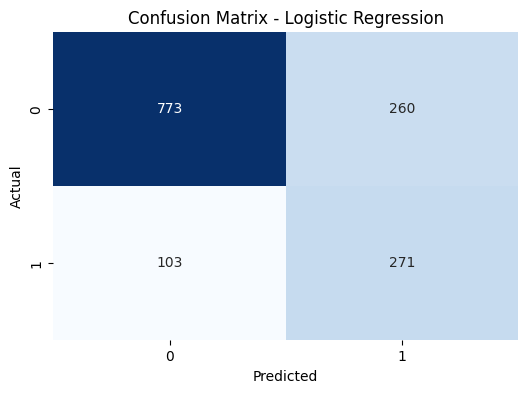

In [41]:
cm = confusion_matrix(y_test, log_reg.predict(X_test))


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


<ipython-input-42-5c1dca7a4118>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


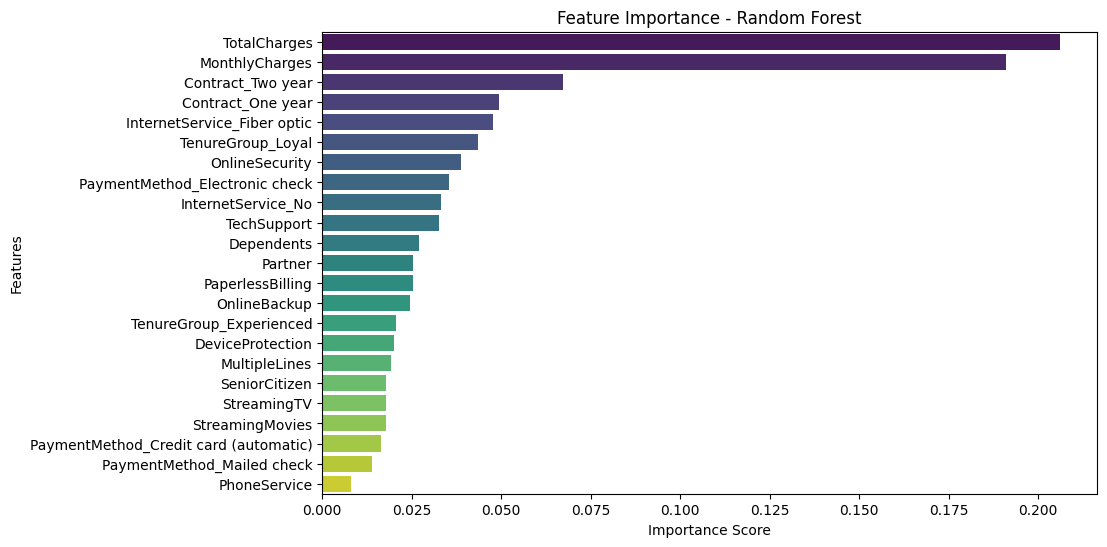

In [42]:
# استخراج أهمية الميزات
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# ترتيب القيم تنازليًا
feature_importances = feature_importances.sort_values(ascending=False)

# رسم المخطط
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


<ipython-input-43-62df54953ab2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")


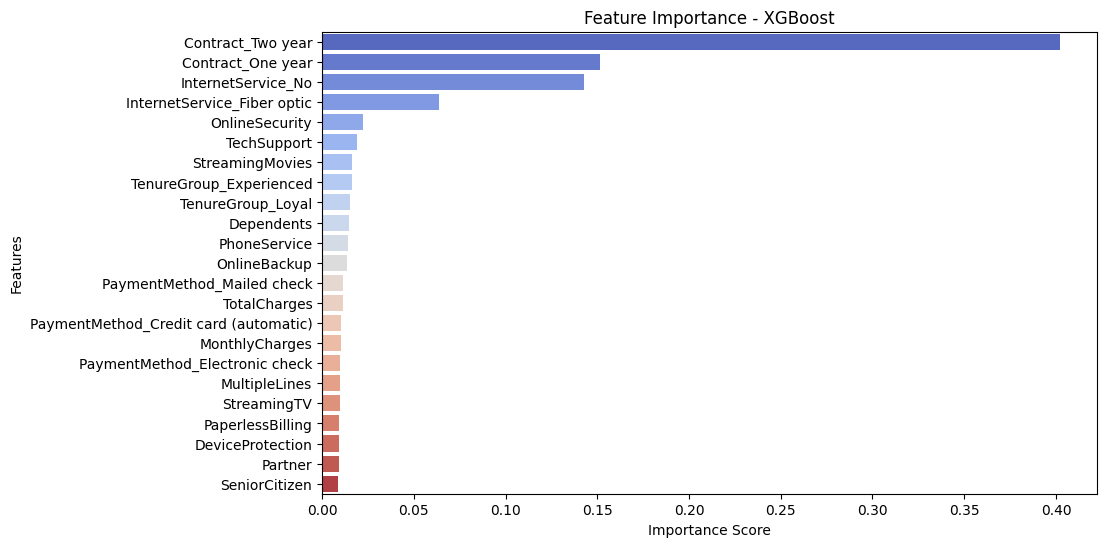

In [43]:
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)


feature_importances = feature_importances.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [44]:
pip install -U xgboost scikit-learn


In [45]:
from sklearn.model_selection import RandomizedSearchCV


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    verbose=2,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)


print(f"Random Forest: {rf_random.best_params_}")


best_rf = rf_random.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf = precision_score(y_test, y_pred_rf_tuned)
recall_rf = recall_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned)
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])

print(f"Random Forest")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest
Accuracy: 0.77
Precision: 0.57
Recall: 0.64
F1-score: 0.60
ROC-AUC: 0.82


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized Search
xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=5,
    verbose=2,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)


print(f" XGBoost: {xgb_random.best_params_}")


best_xgb = xgb_random.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb = recall_score(y_test, y_pred_xgb_tuned)
f1_xgb = f1_score(y_test, y_pred_xgb_tuned)
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:,1])

print(f" XGBoost :")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-score: {f1_xgb:.2f}")
print(f"ROC-AUC: {roc_auc_xgb:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:29:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
 XGBoost المحسن:
Accuracy: 0.76
Precision: 0.54
Recall: 0.70
F1-score: 0.61
ROC-AUC: 0.81


In [53]:
print(f"XGBoost Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"XGBoost :")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-score: {f1_xgb:.2f}")
print(f"ROC-AUC: {roc_auc_xgb:.2f}")

XGBoost Results:
Accuracy: 0.75
Precision: 0.53
Recall: 0.68
F1-score: 0.59
ROC-AUC: 0.81
XGBoost :
Accuracy: 0.76
Precision: 0.54
Recall: 0.70
F1-score: 0.61
ROC-AUC: 0.81


In [48]:
print(f"Random Forest Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")

Random Forest Results:
Accuracy: 0.75
Precision: 0.53
Recall: 0.68
F1-score: 0.59
ROC-AUC: 0.81
Random Forest:
Accuracy: 0.77
Precision: 0.57
Recall: 0.64
F1-score: 0.60
ROC-AUC: 0.82


## Model Deployment

In [49]:
import joblib

# save model
joblib.dump(best_xgb, 'best_xgb_model.pkl')
print("done 'best_xgb_model.pkl'")


done 'best_xgb_model.pkl'


In [50]:
from google.colab import files
files.download('/content/best_xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

you can use model by : https://huggingface.co/spaces/ghinaAI/Telecom_Customer_Churn_Prediction